### 14.3 Model of Two Populations in Competitive Interactive Growth (INTERACT)
From Odum and Odum:
In the model INTERACT, two populations compete by negative effects of their interaction. In this model each of the populations has autocatalytic production and quadratic losses, which make their growth equations logistic (Chapter 13). Both populations have unlimited food concentrations,
because E is constant. Without interactions each population grows and levels off as in Figure 13.5. With negative interactions, neither can maintain as much growth nor as high a population at steady state. With sufficient negative effects, one population may drive out the other, an example of competitive exclusion.![Model of Island Speciation and Diversity.ipynb](attachment:Model of Island Speciation and Diversity.ipynb)

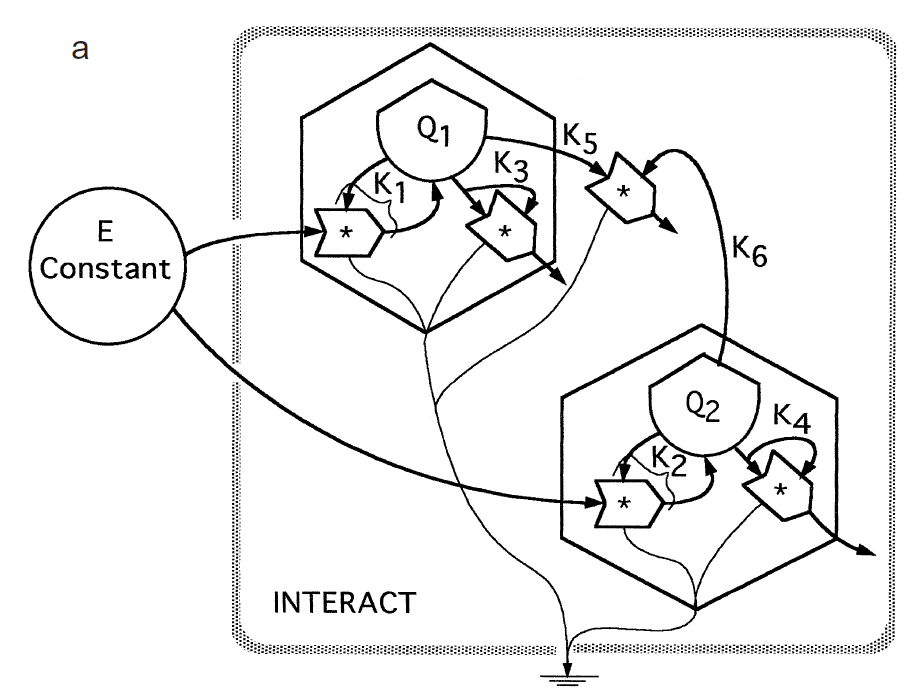

The model is expressed in differential equation format as:  

$$
\begin{align}
\frac{d Q_1}{dt} & = K_1 E Q_1 - K_3 Q_1^2 - K_5 Q_1 Q_2 \\
\frac{d Q_2}{dt} & = K_2 E Q_2 - K_4 Q_2^2 - K_6 Q_1 Q_2
\end{align}
$$
where $Q_1$ is the biomass of species 1 and $Q_2$ is the biomass of species 2. The K's are context specific constants and E is the (constant) driving input of energy.

The model can be reformulated in terms of carrying capacities, $Cap_1$ and $Cap_2$, for the two species as follows: 

$$
\begin{align}
\frac{d Q_1}{dt} & = r_1 Q_1 \left(1 - \frac{Q_1}{Cap_1}\right) - K_5 Q_1 Q_2 \\
\frac{d Q_2}{dt} & = r_2 Q_2 \left(1 - \frac{Q_2}{Cap_2}\right) - K_6 Q_1 Q_2
\end{align}
$$
  
where $r_1 = K_1 E$, $r_2 = K_2 E$, $Cap_1 = r_1/K_3$, and $Cap_2 = r_2 / K_4$.  

This model is implemented for the constants provided in Odum and Odum below.

Text(0, 0.5, 'Q2 Biomass')

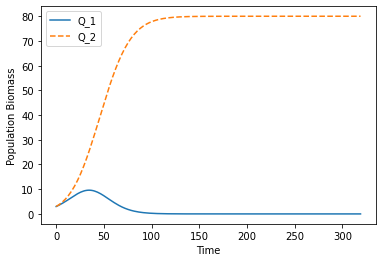

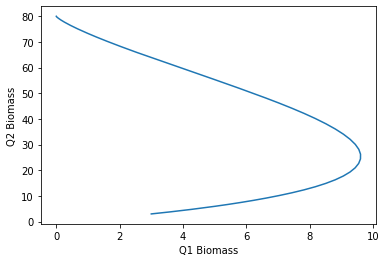

In [2]:
# import statements
import math as m
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
# set global constants
E = 1
K1, K2, K3 = 0.07, 0.08, 0.002, 
K4, K5, K6 = 0.001, 0.002, 0.001
r1, r2 = K1*E, K2*E
Cap1, Cap2 = r1/K3, r2/K4
# set up the derivative function
def INTERACT(t, Q):
    Q1, Q2 = Q
    dQ1 = r1*Q1*(1 - Q1/Cap1) - K5*Q1*Q2
    dQ2 = r2*Q2*(1 - Q2/Cap2) - K6*Q1*Q2
    return [dQ1, dQ2]
# run the ODE solver
soln = solve_ivp(INTERACT, (0, 319), [3,3], dense_output=True)
# graph the populations vs time
t_arr = np.linspace(0,319,200)
plt.plot(t_arr, soln.sol(t_arr)[0], '-', label='Q_1')
plt.plot(t_arr, soln.sol(t_arr)[1], '--', label='Q_2')
plt.xlabel("Time")
plt.ylabel("Population Biomass")
plt.legend()
plt.figure()
plt.plot(soln.sol(t_arr)[0], soln.sol(t_arr)[1])
plt.xlabel("Q1 Biomass")
plt.ylabel("Q2 Biomass")

### What-if 14.3-1
First, set the two interaction coefficients (K5 and K6) to equal zero. Then run. What happens to each population? Is there competitive exclusion? How does your result compare with Figure 14.3b?

Text(0, 0.5, 'Q2 Biomass')

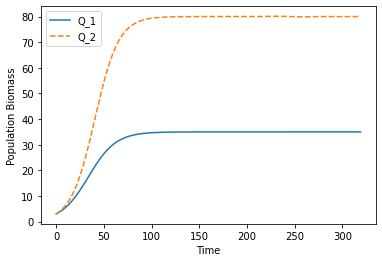

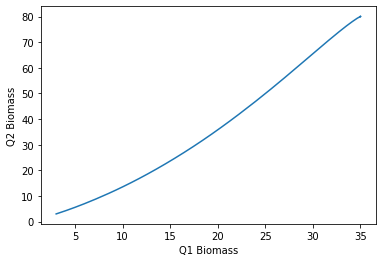

In [3]:
# reset K values
K5, K6 = 0, 0
# re-run the ODE solver
soln = solve_ivp(INTERACT, (0, 319), [3,3], dense_output=True)
# graph the populations vs time
t_arr = np.linspace(0,319,200)
plt.plot(t_arr, soln.sol(t_arr)[0], '-', label='Q_1')
plt.plot(t_arr, soln.sol(t_arr)[1], '--', label='Q_2')
plt.xlabel("Time")
plt.ylabel("Population Biomass")
plt.legend()
plt.figure()
plt.plot(soln.sol(t_arr)[0], soln.sol(t_arr)[1])
plt.xlabel("Q1 Biomass")
plt.ylabel("Q2 Biomass")

In [4]:
print("Cap1 = %g and Cap2 = %g" % (Cap1, Cap2))

Cap1 = 35 and Cap2 = 80


Therefore, with K5 and K6 set to zero, the populations approach their respective capcities.

### What-f 14.3-2
Next, with interactions K5 and K6 still set at zero, decrease the available food supply (energy concentration maintained E) to half ofwhatit was in 
simulation problem 14.3–1. How were growth and steady-state levels changed?

Text(0, 0.5, 'Q2 Biomass')

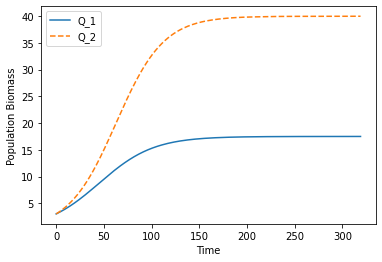

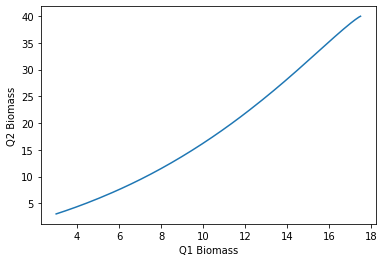

In [5]:
# Set E to 0.5 and re-calculate r and Cap values
E = 0.5
r1, r2 = K1*E, K2*E
Cap1, Cap2 = r1/K3, r2/K4
# re-run the ODE solver
soln = solve_ivp(INTERACT, (0, 319), [3,3], dense_output=True)
# graph the populations vs time
t_arr = np.linspace(0,319,200)
plt.plot(t_arr, soln.sol(t_arr)[0], '-', label='Q_1')
plt.plot(t_arr, soln.sol(t_arr)[1], '--', label='Q_2')
plt.xlabel("Time")
plt.ylabel("Population Biomass")
plt.legend()
plt.figure()
plt.plot(soln.sol(t_arr)[0], soln.sol(t_arr)[1])
plt.xlabel("Q1 Biomass")
plt.ylabel("Q2 Biomass")

In [6]:
print("Cap1 = %g and Cap2 = %g" % (Cap1, Cap2))

Cap1 = 17.5 and Cap2 = 40


The capacities are both cut in half when E is cut in half.

### What-if 14.3-3
Next decrease the interaction coefficient. Set K5 =
0.0005 and run again. What happens to populations
now? Is there competitive exclusion? Explain.

Text(0, 0.5, 'Q2 Biomass')

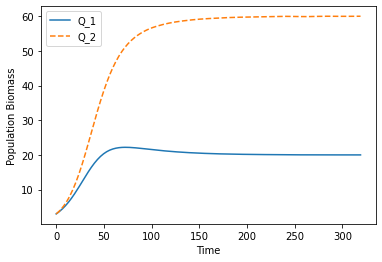

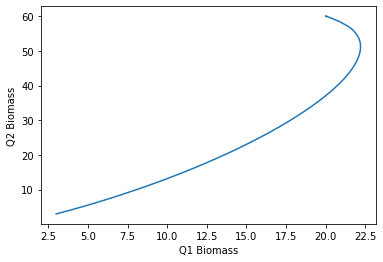

In [7]:
#Re-set all the global coeficients but with K5 changed to 0.0005
E = 1
K1, K2, K3 = 0.07, 0.08, 0.002, 
K4, K5, K6 = 0.001, 0.0005, 0.001
r1, r2 = K1*E, K2*E
Cap1, Cap2 = r1/K3, r2/K4
# re-run the ODE solver
soln = solve_ivp(INTERACT, (0, 319), [3,3], dense_output=True)
# graph the populations vs time
t_arr = np.linspace(0,319,200)
plt.plot(t_arr, soln.sol(t_arr)[0], '-', label='Q_1')
plt.plot(t_arr, soln.sol(t_arr)[1], '--', label='Q_2')
plt.xlabel("Time")
plt.ylabel("Population Biomass")
plt.legend()
plt.figure()
plt.plot(soln.sol(t_arr)[0], soln.sol(t_arr)[1])
plt.xlabel("Q1 Biomass")
plt.ylabel("Q2 Biomass")

The Q_1 population still goes to peak and then declines, but the decline is to a non-zero assymptote suggesting a persistent population of Q_1 over time. In otherwords, there is not competitive exclusion.

### What-if 14.3-4
Next set the second interaction coefficient K6 = 0.002
and run again. How is competition affected now? Can
you increase K6 to a high enough value to displace, the
other species? (Change the coefficient and run again.)

Text(0, 0.5, 'Q2 Biomass')

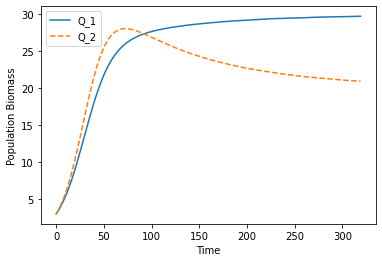

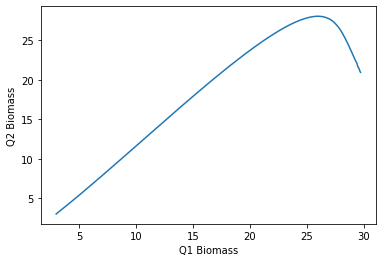

In [8]:
# Set K6
K6 = 0.002
# re-run the ODE solver
soln = solve_ivp(INTERACT, (0, 319), [3,3], dense_output=True)
# graph the populations vs time
t_arr = np.linspace(0,319,200)
plt.plot(t_arr, soln.sol(t_arr)[0], '-', label='Q_1')
plt.plot(t_arr, soln.sol(t_arr)[1], '--', label='Q_2')
plt.xlabel("Time")
plt.ylabel("Population Biomass")
plt.legend()
plt.figure()
plt.plot(soln.sol(t_arr)[0], soln.sol(t_arr)[1])
plt.xlabel("Q1 Biomass")
plt.ylabel("Q2 Biomass")

Q_1 is begining to outcompete Q_2 in this simulation. In the cell below, K6 is increased to the point that Q_2 is competitively excluded.

Text(0, 0.5, 'Q2 Biomass')

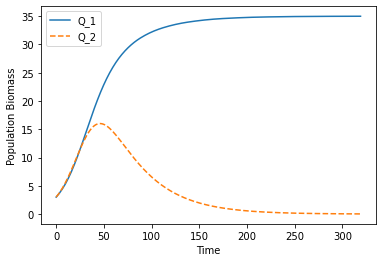

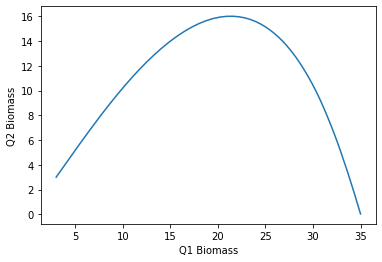

In [9]:
# Set K6
K6 = 0.003
# re-run the ODE solver
soln = solve_ivp(INTERACT, (0, 319), [3,3], dense_output=True)
# graph the populations vs time
t_arr = np.linspace(0,319,200)
plt.plot(t_arr, soln.sol(t_arr)[0], '-', label='Q_1')
plt.plot(t_arr, soln.sol(t_arr)[1], '--', label='Q_2')
plt.xlabel("Time")
plt.ylabel("Population Biomass")
plt.legend()
plt.figure()
plt.plot(soln.sol(t_arr)[0], soln.sol(t_arr)[1])
plt.xlabel("Q1 Biomass")
plt.ylabel("Q2 Biomass")

### A note on the model formulation
The competitive interactions in this model can be formulated in terms of competition between the species for carrying capacity. In other words, $Q_1$ takes up some of $Q_2$'s carrying capacity and vise-versa. In mathematical terms this looks like:

$$
\begin{align}
\frac{d Q_1}{dt} & = r_1 Q_1 \left(1 - \frac{Q_1 + f_{1|2}Q_2}{Cap_1}\right) \\
\frac{d Q_2}{dt} & = r_2 Q_2 \left(1 - \frac{Q_2 + f_{2|1}Q_1}{Cap_2}\right)
\end{align}
$$

where $f_{1|2}$ represents the fraction of $Cap_1$ occupied by $Q_2$ on a per unit of biomass basis and $f_{2|1}$ represents the fraction of $Cap_2$ occupied by $Q_1$

Note that:
$$
f_{1|2} = \frac{K_5 Cap_1}{r_1} \\
f_{2|1} = \frac{K_6 Cap_2}{r_2}
$$

The steady state is when both carrying capcities are full.
$$
Q_1^{ss} + f_{1|2} Q_2^{ss} = Cap_1 \\
Q_2^{ss} + f_{2|1} Q_1^{ss} = Cap_2
$$

In [10]:
import scrapbook as sb
nb = sb.read_notebook('14.3 INTERACT.ipynb')
nb.scraps # Prints a dict of all scraps by name

Scraps()

In [24]:
nb.path

'14.3 INTERACT.ipynb'